# Welcome to the Hello World of ML Models :) Playing with Iris Data set with Supervised & Unsupervised algorithm based classifiers. 

# **Action Plan:**


 1. Problem Statement
 2. Select a Performance Measure
 3. Get the Data
 4. EDA - Discover and Visualize the Data to gain Insights
    - Dimensionality Reduction Check with PCA
    - Unsupervised Algorithm - Clustering Analysis
 5. Split the data into Train and Test sets
 6. ML Model Building
        - Select and Train a Model
        - Evaluate the Model on Test set
          - Naive Bayes Classifier
          - Logistic Regression
          - k-Nearest Neighbors (kNN) Classifier
          - Support Vector Machine (SVM)
          - Decision Tree Classifier 
          - Random Forest Classifier (Ensemble method)
 7. Conclusion

# 1. Problem Statement
* Classify the iris dataset based on the available features Sepal Length, Sepal Width, Petal Length, Petal Width. 
* Gain insights from the data.
* Identify the optimal Classifier ML model for the same.

## About Iris Data set:

**Data set Source:** 
https://archive.ics.uci.edu/ml/datasets/iris

**Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**Predicted attribute:** class of iris plant.


**Attribute Information:**

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# 2. Select a Performance Measure

- Confusion Matrix - True Positive Rate (TPR), False Negative Rate (FNR) etc.
- Accuracy Score

# 3. Get the Data

In [1]:
#Kaggle's way of welcoming us 
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
#Loading the iris dataset in dataframe
irisMaster = pd.read_csv("/kaggle/input/iris/Iris.csv")

#Visualizing the top 5 records
irisMaster.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 4. EDA - Discover and Visualize the Data to gain Insights

In [3]:
#Getting the data summary
irisMaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
print("Total Rows : ",irisMaster.shape[0])
print("Total Columns : ",irisMaster.shape[1])

Total Rows :  150
Total Columns :  6


In [5]:
irisMaster["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

**Observations**:
1. Dataset has a total of 150 records. There are no columnwise missing values. 
2. Total of 6 columns namely Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
3. Species is a Categorical column - This is also going to be the classification prediction model's output.
4. Column 'Id'is a nominal feature - not of much use to us.
5. Remaining 4 columns are going to be the major features for our analysis and model building (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm).
6. All the above 4 features are of dtype - float64.

In [6]:
#Statistical summary of the dataset
irisMaster.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
#Dropping the nominal feature "Id"
iris = irisMaster.drop("Id", axis = 1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


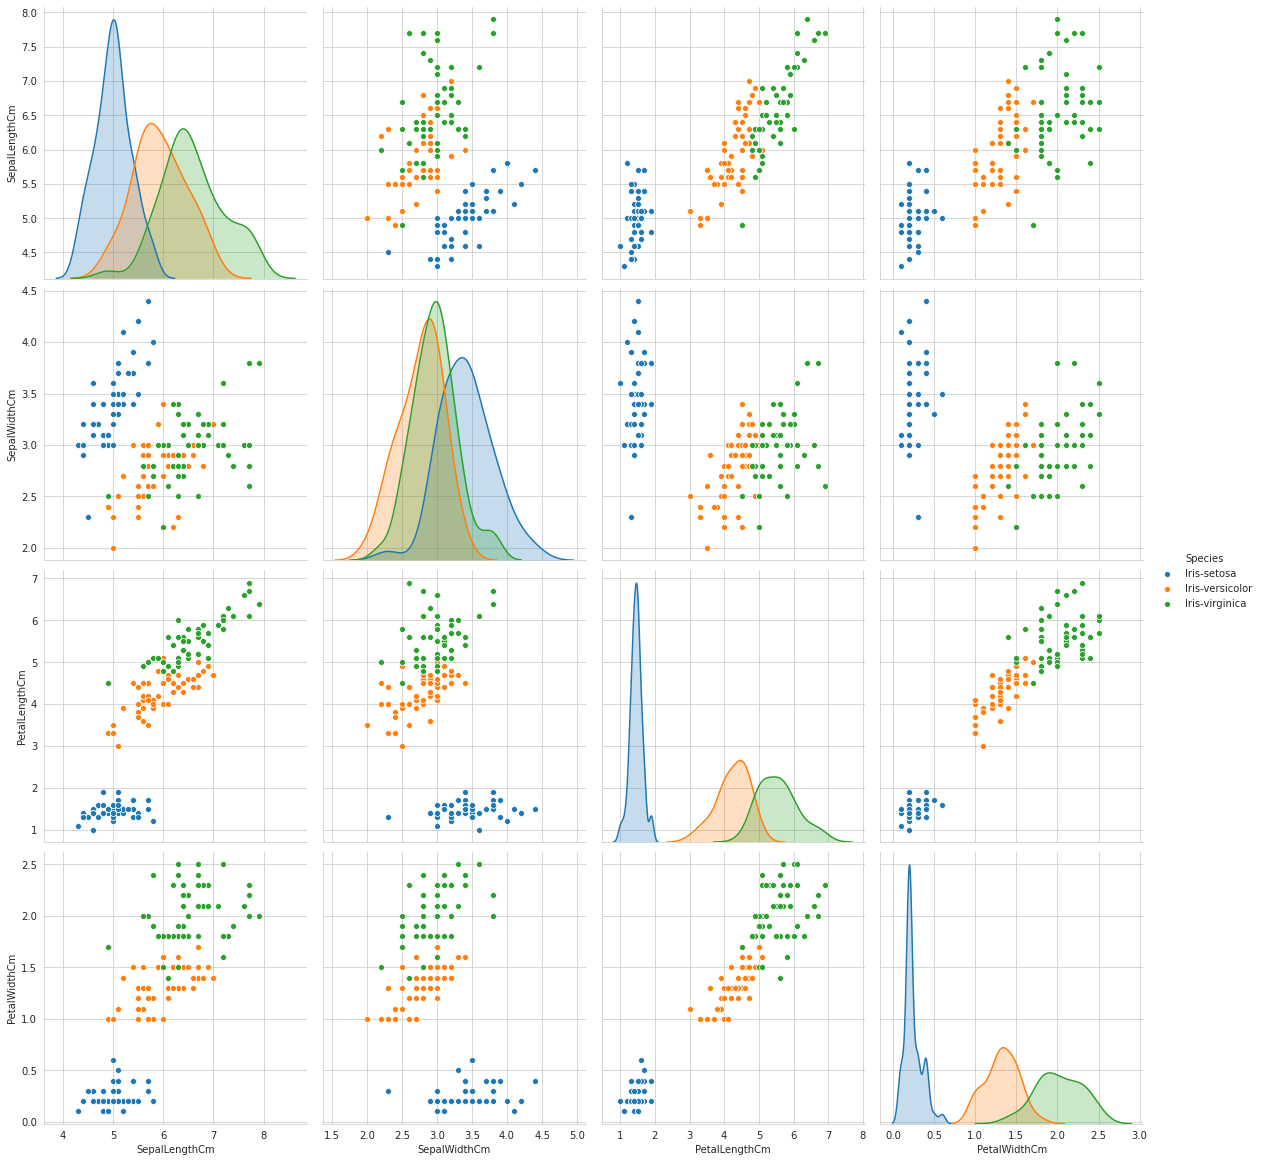

In [8]:
sns.set_style("whitegrid");
sns.pairplot(data = iris, hue = "Species", height = 4)
plt.show()

* From the pairplots, we can see that PetalLengthCm and PetalWidthCm are good features to be in our Model, since they provide distinguishable plots for Setosa and approximately distinguishable plots for Versicolor and Virginica.
* Also, the KDE (Kernel Density Estimates) plot of PetalLengthCm vs PetalWidthCm shows how the distribution of Setosa is clearly separable from the other two species.  

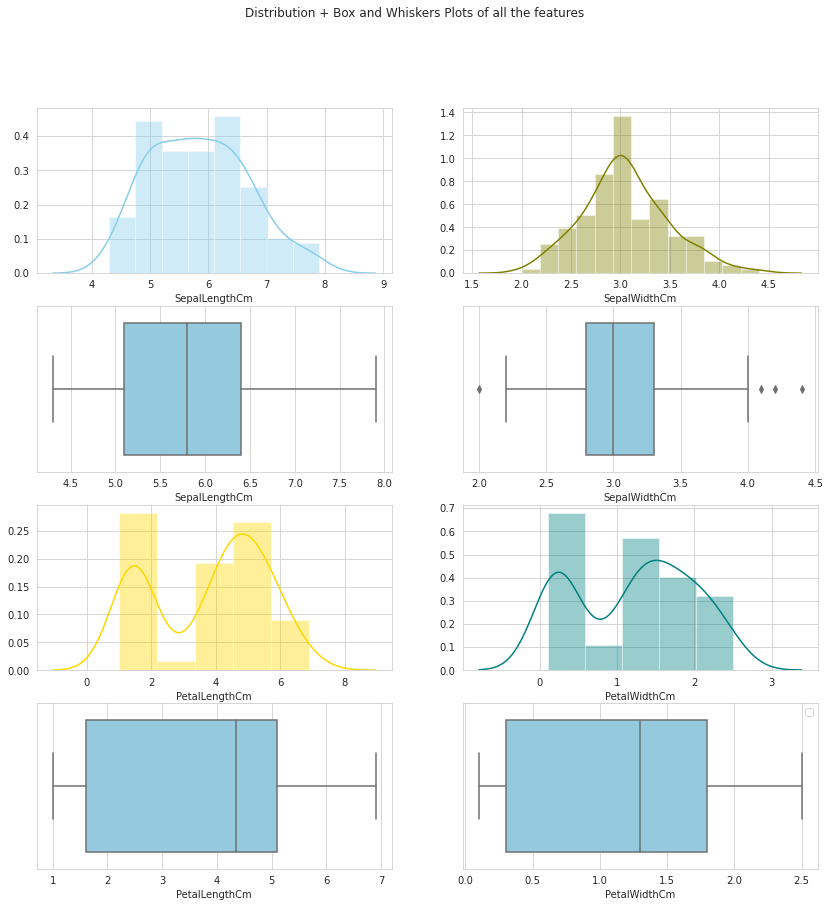

In [9]:
#Visualizing the Distribution & Box plots of all the four features
fig, ax = plt.subplots(4, 2, figsize = (14,14))
sns.distplot(iris["SepalLengthCm"] , color="skyblue", ax=ax[0, 0])
sns.boxplot(iris["SepalLengthCm"] , color="skyblue", ax=ax[1, 0])
sns.distplot(iris["SepalWidthCm"] , color="olive", ax=ax[0, 1])
sns.boxplot(iris["SepalWidthCm"] , color="skyblue", ax=ax[1, 1])
sns.distplot(iris["PetalLengthCm"] , color="gold", ax=ax[2, 0])
sns.boxplot(iris["PetalLengthCm"] , color="skyblue", ax=ax[3, 0])
sns.distplot(iris["PetalWidthCm"] , color="teal", ax=ax[2, 1])
sns.boxplot(iris["PetalWidthCm"] , color="skyblue", ax=ax[3, 1])
plt.suptitle("Distribution + Box and Whiskers Plots of all the features")
plt.legend()
plt.show()

Observations:
- SepalWidthCm KDE curve displays "Normal Distribution" properties.
- PetalLengthCm and PetalWidthCm are having "bimodal" properties are not clearly NOT Normally distributed. 
> *This might be because of the Setosa distribution "mixed" (Gaussian Mixture) with Versicolor and Virginica Species. *
- PetalLengthCm and PetalWidthCm are left-skewed (negative skew). No Outliers are observed in both the attributes. 
- SepalWidthCm and SepalLengthCm shows minimal skewness - same can be confirmed from KDE plots also.
- Few Outliers are observed in SepalWidthCm

## Univariate Analysis

In [10]:
iris_Setosa = iris[iris["Species"] == "Iris-setosa"];
iris_Virginica = iris[iris["Species"] == "Iris-virginica"];
iris_Versicolor = iris[iris["Species"] == "Iris-versicolor"];

print("Setosa: Mean and SD Deviation of Sepal Length : ", np.mean(iris_Setosa["SepalLengthCm"]), np.std(iris_Setosa["SepalLengthCm"]))
print("Setosa: Mean and SD Deviation of Petal Width : ", np.mean(iris_Setosa["SepalWidthCm"]), np.std(iris_Setosa["SepalWidthCm"]))
print("Setosa: Mean and SD Deviation of Sepal Length : ", np.mean(iris_Setosa["PetalLengthCm"]), np.std(iris_Setosa["PetalLengthCm"]))
print("Setosa: Mean and SD Deviation of Petal Width : ", np.mean(iris_Setosa["PetalWidthCm"]), np.std(iris_Setosa["PetalWidthCm"]))
print("\n")
print("Virginica: Mean and SD Deviation of Sepal Length : ", np.mean(iris_Virginica["SepalLengthCm"]), np.std(iris_Virginica["SepalLengthCm"]))
print("Virginica: Mean and SD Deviation of Petal Width : ", np.mean(iris_Virginica["SepalWidthCm"]), np.std(iris_Virginica["SepalWidthCm"]))
print("Virginica: Mean and SD Deviation of Sepal Length : ", np.mean(iris_Virginica["PetalLengthCm"]), np.std(iris_Virginica["PetalLengthCm"]))
print("Virginica: Mean and SD Deviation of Petal Width : ", np.mean(iris_Virginica["PetalWidthCm"]), np.std(iris_Virginica["PetalWidthCm"]))
print("\n")
print("Versicolor: Mean and SD Deviation of Sepal Length : ", np.mean(iris_Versicolor["SepalLengthCm"]), np.std(iris_Versicolor["SepalLengthCm"]))
print("Versicolor: Mean and SD Deviation of Petal Width : ", np.mean(iris_Versicolor["SepalWidthCm"]), np.std(iris_Versicolor["SepalWidthCm"]))
print("Versicolor: Mean and SD Deviation of Sepal Length : ", np.mean(iris_Versicolor["PetalLengthCm"]), np.std(iris_Versicolor["PetalLengthCm"]))
print("Versicolor: Mean and SD Deviation of Petal Width : ", np.mean(iris_Versicolor["PetalWidthCm"]), np.std(iris_Versicolor["PetalWidthCm"]))

Setosa: Mean and SD Deviation of Sepal Length :  5.005999999999999 0.348946987377739
Setosa: Mean and SD Deviation of Petal Width :  3.4180000000000006 0.37719490982779713
Setosa: Mean and SD Deviation of Sepal Length :  1.464 0.17176728442867115
Setosa: Mean and SD Deviation of Petal Width :  0.2439999999999999 0.10613199329137278


Virginica: Mean and SD Deviation of Sepal Length :  6.587999999999998 0.6294886813914925
Virginica: Mean and SD Deviation of Petal Width :  2.9739999999999998 0.319255383666431
Virginica: Mean and SD Deviation of Sepal Length :  5.552 0.5463478745268441
Virginica: Mean and SD Deviation of Petal Width :  2.026 0.2718896835115301


Versicolor: Mean and SD Deviation of Sepal Length :  5.936 0.5109833656783752
Versicolor: Mean and SD Deviation of Petal Width :  2.7700000000000005 0.31064449134018135
Versicolor: Mean and SD Deviation of Sepal Length :  4.26 0.4651881339845204
Versicolor: Mean and SD Deviation of Petal Width :  1.3259999999999998 0.1957651654406

Observations:
- Mean of Petal Width for all the three species are on lower side compared to others. 

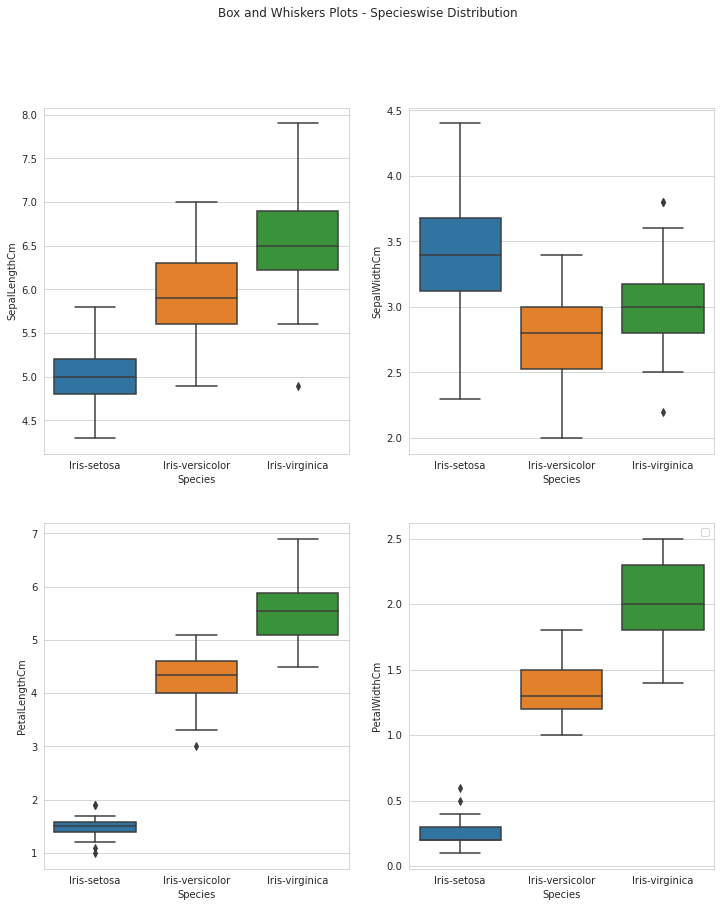

In [11]:
fig, ax = plt.subplots(2,2, figsize = (12,14))
sns.boxplot(x='Species',y = "SepalLengthCm", data=iris, ax=ax[0, 0])
sns.boxplot(x='Species',y = "SepalWidthCm", data=iris, ax=ax[0,1])
sns.boxplot(x='Species',y = "PetalLengthCm", data=iris, ax=ax[1, 0])
sns.boxplot(x='Species',y = "PetalWidthCm", data=iris, ax=ax[1, 1])
plt.suptitle("Box and Whiskers Plots - Specieswise Distribution")
plt.legend()
plt.show()

## Multivariate Analysis

In [12]:
irisCorr = iris.corr()
irisCorr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [13]:
irisCovar = iris.cov()
irisCovar

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


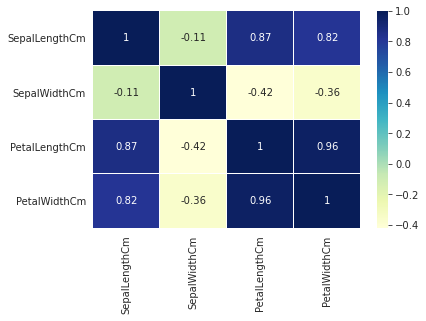

In [14]:
sns.heatmap(irisCorr, annot = True, cmap = "YlGnBu", linewidth = 0.1)
plt.show()

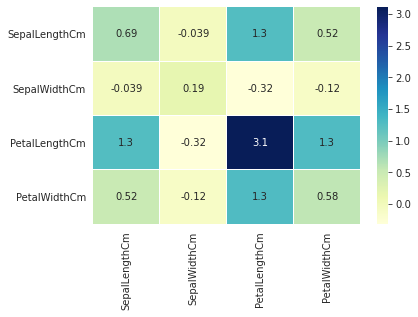

In [15]:
sns.heatmap(irisCovar, annot = True, cmap = "YlGnBu", linewidth = 0.1)
plt.show()

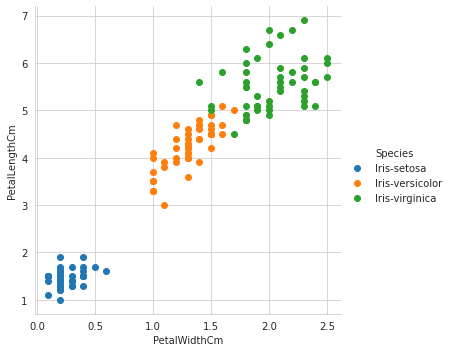

In [16]:
#Let us explore how Petal Width and Petal Length features are distributed
sns.FacetGrid(iris, hue = "Species", height = 5).map(plt.scatter, "PetalWidthCm", "PetalLengthCm").add_legend();
plt.show()

## Dimensionality Reduction Check using PCA
PetalLengthCm and PetalWidthCm are strong positively correlated. Let us check if we can reduce the number of dimensions from existing four to a lesser number.

In [17]:
from sklearn.decomposition import PCA  

#Input Features in 4-Dimensions in X variable, Preparing the target in Y variable
X_iris = iris.drop('Species', axis=1)
y_iris = iris['Species']

model = PCA(n_components=2) # hyperparameters setting
model.fit(X_iris)                      
X_iris_2D = model.transform(X_iris)  # Transform the data to two dimensions

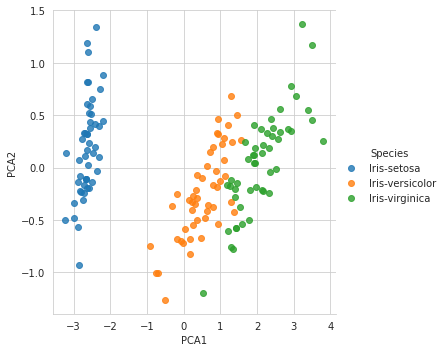

In [18]:
iris['PCA1'] = X_iris_2D[:, 0]
iris['PCA2'] = X_iris_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='Species', data=iris, fit_reg=False);

Conclusion:
Even after the PCA transformation is applied, still the features in 2-Dimensions are fairly well separated. Therefore, we will be going ahead with all the four features as initially concluded. 

## Unsupervised : Clustering Alogorithm for Gaussian Mixture Models

In [19]:
from sklearn.mixture import GaussianMixture      
model = GaussianMixture(n_components=3, covariance_type='full')  # hyperparameters
model.fit(X_iris)                    
y_gmm = model.predict(X_iris)        # determine the cluster labels

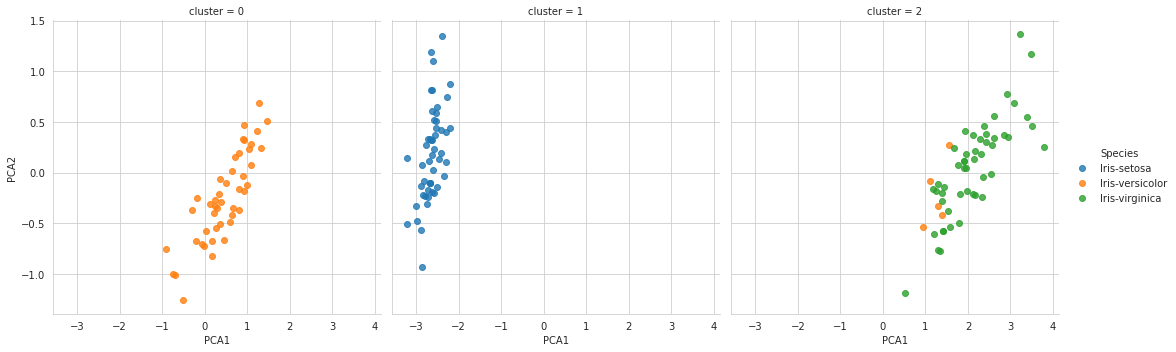

In [20]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='Species', col='cluster', fit_reg=False);

Clustering algorithms try to cluster the data points without considering the 'label' data. From the output plots, we can clearly see that the iris species here can be easily classified into three different clusters.

**Observations:**
1. PetalLengthCm and PetalWidthCm are strong positively correlated.
2. However, SepalLengthCm and SepalWidthCm are not correlated.
3. SepalLengthCm is showing positive correlation with remaining three features.
4. However, SepalWidthCm is showing weak correlations with remaining three features.

**Conclusion:** It is better to include all the four attributes in our model.

# 5. Split the data into Train and Test sets

In [21]:
# Importing various classifiers
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm

In [22]:
#Splitting the dataset into train and test sets in the ration 70:30
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = 0.30, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# 6. ML Model Building & Evaluation

The accuracy of the Naive Bayes Classifier is 0.9778
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


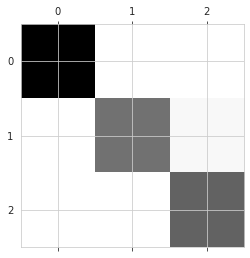

In [24]:
#Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

#Model Performance Metrics
gNBMetrics = metrics.accuracy_score(y_test, prediction).round(4)
print('The accuracy of the Naive Bayes Classifier is',gNBMetrics)

confMat = metrics.confusion_matrix(y_test, prediction)
print(confMat)
plt.matshow(confMat, cmap = "Greys");



The accuracy of the Logistic Regression is 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


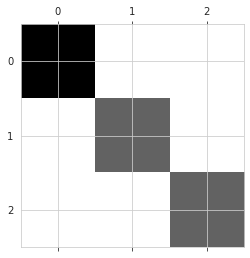

In [25]:
#LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

#Model Performance Metrics
logisticRegMetrics = metrics.accuracy_score(y_test, prediction).round(4)
print('The accuracy of the Logistic Regression is',logisticRegMetrics)

confMat = metrics.confusion_matrix(y_test, prediction)
print(confMat)
plt.matshow(confMat, cmap = "Greys");

Maximum accuracy of k-Nearest Neighbors Classifier is :  1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


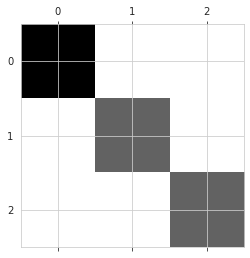

In [26]:
#K Nearest Neighbors
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, prediction).round(4))
    
kNNRegMetrics = max(scores)
print("Maximum accuracy of k-Nearest Neighbors Classifier is : ", max(scores)) 

confMat = metrics.confusion_matrix(y_test, prediction)
print(confMat)
plt.matshow(confMat, cmap = "Greys")

# plt.plot(k_range, scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The accuracy of the Support Vector Machine is 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


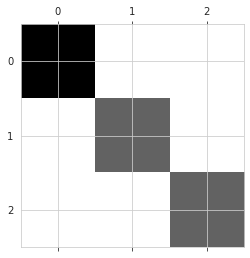

In [27]:
#Support Vector Machine
model = svm.SVC()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
svmRegMetrics = metrics.accuracy_score(y_test, prediction)
print('The accuracy of the Support Vector Machine is',svmRegMetrics.round(4))

confMat = metrics.confusion_matrix(y_test, prediction)
print(confMat)
plt.matshow(confMat, cmap = "Greys");

Most of the values are in main diagonal of Confusion Matrix. It shows the model is performing well.

The accuracy of the Decision Tree Classifier is 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


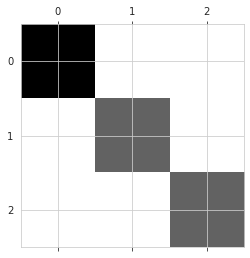

In [28]:
#DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
decisionTreeMetrics = metrics.accuracy_score(y_test, prediction)
print('The accuracy of the Decision Tree Classifier is',decisionTreeMetrics.round(4))

confMat = metrics.confusion_matrix(y_test, prediction)
print(confMat)
plt.matshow(confMat, cmap = "Greys");

The accuracy of the Random Forest Classifier is 1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


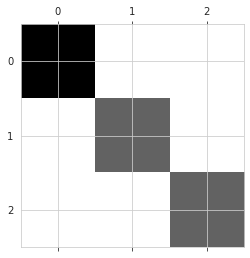

In [29]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
rForestMetrics = metrics.accuracy_score(y_test, prediction)
print('The accuracy of the Random Forest Classifier is',svmRegMetrics.round(4))

confMat = metrics.confusion_matrix(y_test, prediction)
print(confMat)
plt.matshow(confMat, cmap = "Greys");

# 7. Conclusion:

## Tree based Classifiers has provided a better performance score than Logistic Regression and Support Vector Machines. This is majorly because of the nature of dataset, which can be classified in terms of simple logical rules. 